In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import urllib
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

Getting info from webiste: https://docs.python.org/3/library/urllib.request.html#urllib.request.urlopen

In [2]:
#data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
company_review = pd.read_csv(".\hackgt20_data.csv", encoding='windows-1252')
company_review.head()

,Company,Sentiment,Text
0,Google,Positive,Will not share Your Customer Data or any Third...
1,Google,Negative,GOOGLE WILL NOT BE LIABLE FOR YOUR LOST REVENU...
2,Google,Negative,"You will indemnify, defend, and hold harmless ..."
3,Google,Positive,Google will post notice of modifications to th...
4,Google,Negative,GOOGLE'S TOTAL CUMULATIVE LIABILITY TO YOU OR ...


6.0
4.0


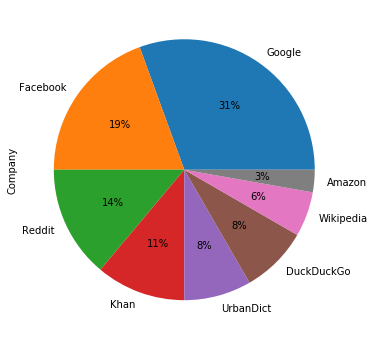

In [3]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 
company_review.Company.value_counts().plot(kind='pie', autopct='%1.0f%%')

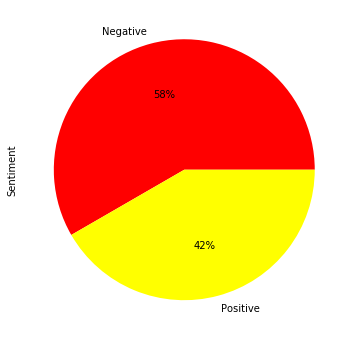

In [4]:
company_review.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

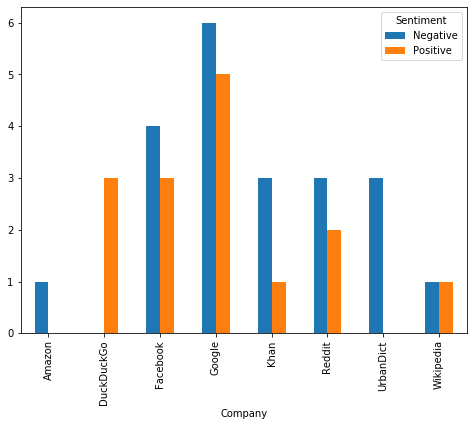

In [5]:
company_sentiment = company_review.groupby(['Company', 'Sentiment']).Sentiment.count().unstack()
company_sentiment.plot(kind='bar')

In [6]:
features = company_review.iloc[:, 2].values
labels = company_review.iloc[:, 1].values
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [7]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer (max_features=1000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [8]:
print(processed_features)

[[0.31622777 0.         0.9486833  0.        ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.70710678 0.         0.70710678 0.        ]
 [0.89442719 0.         0.4472136  0.        ]
 [0.         1.         0.         0.        ]
 [0.81836969 0.57469213 0.         0.        ]
 [0.         0.57469213 0.         0.81836969]
 [0.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.57469213 0.         0.81836969]
 [0.         0.81461049 0.         0.58000841]
 [0.         1.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         

In [9]:
# this uses Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
predictions_RFC = text_classifier.predict(X_test)

print("Confusion matrix: \n", confusion_matrix(y_test,predictions_RFC))
print("Classification report: \n", classification_report(y_test,predictions_RFC))
print("Random Forest Classifier Accuracy Score -> ", accuracy_score(y_test, predictions_RFC)*100)

Confusion matrix: 
 [[2 4]
 [0 2]]
Classification report: 
               precision    recall  f1-score   support

    Negative       1.00      0.33      0.50         6
    Positive       0.33      1.00      0.50         2

    accuracy                           0.50         8
   macro avg       0.67      0.67      0.50         8
weighted avg       0.83      0.50      0.50         8

Random Forest Classifier Accuracy Score ->  50.0


In [10]:
# this uses Support Vector Machine
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)

# Use accuracy_score function to get the accuracy
print("Confusion matrix: \n", confusion_matrix(y_test,predictions_SVM))
print("Classification report: \n", classification_report(y_test,predictions_SVM))
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

Confusion matrix: 
 [[1 5]
 [2 0]]
Classification report: 
               precision    recall  f1-score   support

    Negative       0.33      0.17      0.22         6
    Positive       0.00      0.00      0.00         2

    accuracy                           0.12         8
   macro avg       0.17      0.08      0.11         8
weighted avg       0.25      0.12      0.17         8

SVM Accuracy Score ->  12.5


In [11]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Confusion matrix: \n", confusion_matrix(y_test,predictions_NB))
print("Classification report: \n", classification_report(y_test,predictions_NB))
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Confusion matrix: 
 [[5 1]
 [2 0]]
Classification report: 
               precision    recall  f1-score   support

    Negative       0.71      0.83      0.77         6
    Positive       0.00      0.00      0.00         2

    accuracy                           0.62         8
   macro avg       0.36      0.42      0.38         8
weighted avg       0.54      0.62      0.58         8

Naive Bayes Accuracy Score ->  62.5
